# **Real-Time Communication System Powered By AI For Specially Abled**

**Loading the Dataset & Image Data Generation**

In [60]:
import keras
keras.__version__

'2.9.0'

In [68]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ErVrjDC4qbmR1KaZotX54AAbOcw1lsNAQYG-B3x3Sw7r',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handgesturerecognition-donotdelete-pr-hhsthql6vq5etp'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [69]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [70]:
pwd

'/home/wsuser/work'

In [71]:
import os
filenames = os.listdir('/home/wsuser/work/Data Collection/test_set/')

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
# Training Dataset
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Dataset
test_datagen = ImageDataGenerator(rescale=1/255)


In [74]:
# Training Dataset
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Data Collection/training_set/',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Data Collection/test_set/',target_size=(64,64), class_mode='categorical',batch_size=900)


Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [75]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [76]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Model Creation**

In [77]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [78]:
# Creating Model
model=Sequential()

In [79]:
# Adding Convolution Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [80]:
# Adding Pool Layers
model.add(MaxPooling2D(pool_size=(2,2)))

In [81]:
# Adding Flatten Layers
model.add(Flatten())

In [82]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [83]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=18,epochs=10,validation_data=x_test,validation_steps=40)

/tmp/wsuser/ipykernel_164/3484864488.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=18,epochs=10,validation_data=x_test,validation_steps=40)


Epoch 1/10
18/18 [==============================] - 75s 4s/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.2708 - val_accuracy: 0.9760
Epoch 2/10
18/18 [==============================] - 70s 4s/step - loss: 0.0043 - accuracy: 0.9989
Epoch 3/10
18/18 [==============================] - 70s 4s/step - loss: 0.0033 - accuracy: 0.9996
Epoch 4/10
18/18 [==============================] - 71s 4s/step - loss: 0.0030 - accuracy: 0.9996
Epoch 5/10
18/18 [==============================] - 71s 4s/step - loss: 0.0026 - accuracy: 0.9996
Epoch 6/10
18/18 [==============================] - 72s 4s/step - loss: 0.0022 - accuracy: 0.9996
Epoch 7/10
18/18 [==============================] - 71s 4s/step - loss: 0.0015 - accuracy: 0.9997
Epoch 8/10
18/18 [==============================] - 73s 4s/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/10
18/18 [==============================] - 70s 4s/step - loss: 0.0011 - accuracy: 0.9999
Epoch 10/10
18/18 [==============================] - 70s 4s/step - loss: 0.0

**Saving the Model**

In [41]:
#Saving the model
model.save('aslpng1.h5')

In [49]:
!tar -zcvf hand-gesture-recognition-model.tgz aslpng1.h5

aslpng1.h5


In [50]:
ls

 aslpng1.h5  'Data Collection'/   hand-gesture-recognition-model.tgz


In [98]:
!pip install watson-machine-learning-client --upgrade

In [99]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"ylO-swSSvJcDO5mEeIXURwD1NhePCF5BYrKtuByI2QH3"
                }
client = APIClient(wml_credentials)

In [100]:
client = APIClient(wml_credentials)

In [101]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [102]:
space_uid = guid_from_space_name(client,'Hand Gesture Recognition')
space_uid

'0b293060-2bce-4f00-b71f-cb1e0cc18c72'

In [103]:
client.set.default_space(space_uid)

'SUCCESS'

In [104]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [110]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [111]:
ls

 aslpng1.h5  'Data Collection'/   hand-gesture-recognition-model.tgz


In [112]:
model_details=client.repository.store_model(model="hand-gesture-recognition-model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME: "CNN_gesture_recognition",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

In [113]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-22T17:24:10.143Z',
  'id': 'e1e6e4dc-e38c-4270-a44d-d498b54df3a7',
  'modified_at': '2022-11-22T17:24:18.673Z',
  'name': 'CNN_gesture_recognition',
  'owner': 'IBMid-666002GA2D',
  'resource_key': 'ef2eeac3-61eb-4efa-ab42-dd0f3ff16f1a',
  'space_id': '0b293060-2bce-4f00-b71f-cb1e0cc18c72'},
 'system': {'warnings': []}}

In [114]:
model_id=client.repository.get_model_id(model_details)
model_id

'e1e6e4dc-e38c-4270-a44d-d498b54df3a7'

In [115]:
client.repository.list()

------------------------------------  -----------------------  ------------------------  --------------  -----
GUID                                  NAME                     CREATED                   FRAMEWORK       TYPE
e1e6e4dc-e38c-4270-a44d-d498b54df3a7  CNN_gesture_recognition  2022-11-22T17:24:10.002Z  tensorflow_2.7  model
------------------------------------  -----------------------  ------------------------  --------------  -----


In [117]:
model_id="e1e6e4dc-e38c-4270-a44d-d498b54df3a7"
client.repository.download(model_id,"gesture-recognition-model.tgz")

Successfully saved model content to file: 'gesture-recognition-model.tgz'


'/home/wsuser/work/gesture-recognition-model.tgz'

**Testing the model**

In [118]:
#Importing the necessary packages
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [119]:
#Loading the saved model
model=load_model('aslpng1.h5')

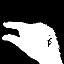

In [120]:
#Loading the test image
test_image=image.load_img('/home/wsuser/work/Data Collection/test_set/G/162.png',
                   target_size=(64,64))
test_image

**Image Preprocessing**

In [121]:
#image to array conversion
tmp=image.img_to_array(test_image)

In [122]:
#Image Dimension expansion
print('Image Dimension before expansion',tmp.ndim)
tmp=np.expand_dims(tmp,axis=0)
print('Image Dimension after expansion',tmp.ndim)

Image Dimension before expansion 3
Image Dimension after expansion 4


**Prediction**

In [123]:
prediction=np.argmax(model.predict(tmp),axis=1)
index=['A','B','C','D','E','F','G','H','I']
print(index[prediction[0]])

1/1 [==============================] - 0s 70ms/step
G
